# Build FakeHuayi backend

## Basic Use

Required files:

- ./huayi_providers/fake_huayi/
    - \_\_init\_\_.py
    - fake_huayi.py
    - props_huayi.json
    - conf_huayi.json
    - defs_huayi.json (if Pulse Backend is applied, TODO)
- ./
    - qubits_data.csv
    - gates_data.csv

Import FakeHuayi backend

```
from huayi_providers.fake_huayi import *
FackHuayi()    # for V1 backend
FackHuayiV2()  # for V2 backend
```

Generate noise model
```
from qiskit_aer.noise.noise_model import NoiseModel
noise_Huayi = NoiseModel.from_backend(FakeHuayi())
```

Create .json files that required to build the backend

```
from huayi_providers.backend_build import build_from_file
c = build_from_file(backend_name="huayi",
                    backend_version="x.x.x",
                    qubits_data="qubits_data.csv",
                    gates_data="gates_data.csv")
```

## File Structure

#### Expriment data

**qubits_data.csv** contains the information of qubits, including
- T1 time (ms)
- T2 time (ms)
- frequency (MHz)
- readout error rate
- Probability of finding 0 when prepared in 1
- Probability of finding 1 when prepared in 0
- readout length (us)

All information should be accompanied with the measurement date and time.

**gates_data.csv** contains the information of gates, including
- qubits
- gate type
- error rate
- length (us)
- gate name (optional)

The gate error and length are measured from experiment, and should be accompanied with the measurement date and time.

#### Dictionaries of the backend properties and configurations

**props_huayi.json**
```
{'backend_name': 'fakehuayi',
 'backend_version='0.0.1',
 'last_update_date': now_time(),
 'qubits': [q1, q2, ...],
 'gates': [g1, g2, ...],
 'general': []}
```
 qubit info (q):
```
 [{'date': ['T1_date'], 'name': 'T1', 'unit': 'ms', 'value': ['T1']},
  {'date': ['T2_date'], 'name': 'T2', 'unit': 'ms', 'value': ['T2']},
  {'date': ['frequency_date'], 'name': 'frequency', 'unit': 'MHz', 'value': ['frequency']},
  {'date': ['readout_error_date'], 'name': 'readout_error', 'unit': '', 'value': ['readout_error']},
  {'date': ['prob_meas0_prep1_date'], 'name': 'prob_meas0_prep1', 'unit': '', 'value': ['prob_meas0_prep1']},
  {'date': ['prob_meas1_prep0_date'], 'name': 'prob_meas1_prep0', 'unit': '', 'value': ['prob_meas1_prep0']},
  {'date': ['readout_length_date'], 'name': 'readout_length', 'unit': 'us', 'value': ['readout_length']}]
```
gate info (g):
```
{'qubits': ['qubits'],
 'gate': ['gate'],
 'parameters': [{'date': ['error_date'],
                 'name': 'gate_error',
                 'unit': '',
                 'value': ['gate_error']},
                {'date': ['length_date'],
                 'name': 'gate_length',
                 'unit': 'ms',
                 'value': ['gate_length']}],
 'name': ['name']}
```

**conf_huayi.json**

#### Dictionary of the Noise Model

The keys in NoiseModel are
- basis gates ({'id', 'x', 'sx', 'rz', 'cx'})
- noise instructions ({'id', 'x', 'sx', 'cx', 'measure', 'reset', ''})
- noise qubits ({0, ... , 26})
- default quantum errors (set None by default)
- default readout errors (set None by default)
- local quantum errors
- local readout errors
- custom noise passes (set None by default)

**local readout errors**

```
noise_model._local_readout_errors = {(0,):ReadoutError, 
                                     (1,):ReadoutError, 
                                     (2,):ReadoutError, ...}
```

``ReadoutError`` is essentially a matrix, the off-diagonal terms corresponds to ``prob_meas0_prep1`` and ``prob_meas1_prep0``

If ``prob_meas0_prep1`` and ``prob_meas1_prep0`` are given, ``readout_error`` will be ignored.


**local quantum errors**

The errors of ``gate`` applied to indices ``ind = (i,) for one-bit gate, (i,j) for two-bit gate`` are stored in

```
noise_model._local_quantum_errors[gate][ind] = {
  '_id': xxxx,
  '_probs': list_of_probs,
  '_circs': list_of_circs,
  '_qargs': None,
  '_op_shape': OpShape(num_qargs_l, num_qargs_r)}
```

``_circs`` includes all possible matrices with the same shape of the corresponding gate

``_probs`` is the corresponding probability of each circ

For one-bit gate, ``_circ`` includes `I`, `X`, `Y`, `Z`. The probs of nonidentity matrices are ``gate_error/2``. ``gate_error`` in `.csv` file refers to the measurement of `1-(I+Z)`.

For two-bit gate, ``_circ`` includes `II`, `IX`, `IY`, `IZ`, `XI`, `XX`, `XY`, `XZ`, `YI`, `YX`, `YY`, `YZ`, `ZI`, `ZX`, `ZY`, `ZZ`. The probs of nonidentity matrices are ``gate_error/12``. ``gate_error`` in `.csv` file refers to the measurement of `1-(II+IZ+ZI+ZZ)`.



## Build a backend from csv files

In [16]:
# Generate props_huayi.json from .csv experimental data
from huayi_providers.backend_build import build_from_file

"""
'gate_radius' defines a coupling_map with the distance between two-qubit gates smaller (or equal) to gate_radius
But suggest not to use 'gate_radius', but define the 'coupling_map' in transpile()

use the following map for finite-range coupling:

       coupling_map = [[i,j] for i in range(n_qubits)
                             for j in list(range(max(0,i-gate_radius),i))+
                                      list(range(i+1,min(i+1+gate_radius,n_qubits)))]
"""
c = build_from_file(backend_name='QuantinuumH2',
       backend_version='0.0.1',
       qubits_data='qubits_data_32.csv', 
       gates_data='gates_data_32.csv',
       gate_radius=5)


Successfully created props_QuantinuumH2.json
Successfully created conf_QuantinuumH2.json
New backends created, please import the backends with:
from huayi_providers.fake_QuantinuumH2 import FakeQuantinuumh2, FakeQuantinuumh2V2


## Check if the new backend works

In [63]:
from huayi_providers.fake_huayi8 import FakeHuayi8, FakeHuayi8V2
from qiskit.circuit.library import EfficientSU2
from qiskit import transpile
from qiskit import QuantumCircuit

n_qubits = 4
ansatz = EfficientSU2(n_qubits, 
                      su2_gates=['ry'], 
                      entanglement="linear", 
                      reps=1,
                      flatten=True)
print("Efficient SU2 ansatz")
print(ansatz.draw(fold=140, idle_wires=False))


coupling_map = [[i,j] for i in range(8)
                      for j in list(range(max(0,i-3),i))+
                               list(range(i+1,min(i+1+3,8)))]
c_huayi = transpile(ansatz, backend=FakeHuayi8(), optimization_level=3)
print("Transpileed with Huayi backend, depth = {}".format(c_huayi.depth()))
print(c_huayi.draw(fold=140, idle_wires=False))


Efficient SU2 ansatz
     ┌──────────┐     ┌──────────┐                        
q_0: ┤ Ry(θ[0]) ├──■──┤ Ry(θ[4]) ├────────────────────────
     ├──────────┤┌─┴─┐└──────────┘┌──────────┐            
q_1: ┤ Ry(θ[1]) ├┤ X ├─────■──────┤ Ry(θ[5]) ├────────────
     ├──────────┤└───┘   ┌─┴─┐    └──────────┘┌──────────┐
q_2: ┤ Ry(θ[2]) ├────────┤ X ├─────────■──────┤ Ry(θ[6]) ├
     ├──────────┤        └───┘       ┌─┴─┐    ├──────────┤
q_3: ┤ Ry(θ[3]) ├────────────────────┤ X ├────┤ Ry(θ[7]) ├
     └──────────┘                    └───┘    └──────────┘
Transpileed with Huayi backend, depth = 13
global phase: π
         ┌──────────┐┌─────────┐┌───────┐   ┌─────────┐ ┌───────┐   ┌──────────┐                                             
q_1 -> 2 ┤ Ry(θ[1]) ├┤ Ry(π/2) ├┤ Rx(π) ├─■─┤ Ry(π/2) ├─┤ Rx(π) ├─■─┤ Ry(θ[5]) ├─────────────────────────────────────────────
         ├──────────┤├─────────┤├───────┤ │ └─────────┘ └───────┘ │ └──────────┘            ┌─────────┐ ┌───────┐┌──────────┐
q_3 -> 3 ┤ 

I have manually forced the CZ gate error very large (~0.8) except for the couplings between [1,3], [1,5] and [3,7]
The transpiled circuit indeed only connects the low-error qubits

## Create random properties of qubits and gates

In [10]:
import pandas as pd
import random
from huayi_providers.backend_build import now_time

n_qubits = 32

qubits_info = pd.DataFrame(columns=['T1','T1_date', 
                                    'T2','T2_date', 
                                    'frequency', 'frequency_date', 
                                    'readout_error', 'readout_error_date', 
                                    'prob_meas0_prep1','prob_meas0_prep1_date', 
                                    'prob_meas1_prep0', 'prob_meas1_prep0_date', 
                                    'readout_length', 'readout_length_date'])
for i in range(n_qubits):
    qubits_info.loc[i] = [abs(random.gauss(50e3, 1e3)), now_time(), # T1
                         abs(random.gauss(1000, 50)), now_time(),   # T2
                         abs(random.gauss(1, 0.05)), now_time(),    # frequency
                         abs(random.gauss(0.0005, 0.0001)), now_time(), # readout_error
                         abs(random.gauss(0.0005, 0.0001)), now_time(), # prob_0_1
                         abs(random.gauss(0.0005, 0.0001)), now_time(), # prob_1_0
                         abs(random.gauss(0.1, 0.01)), now_time(),] # readout_length
with open('qubits_data_{}.csv'.format(n_qubits), 'w') as f:
    qubits_info.to_csv(f)


gates_info = pd.DataFrame(columns=['qubits',
                                   'gate',
                                   'gate_error', 'error_date',
                                   'gate_length', 'length_date',
                                   'name'])
iter = -1
for gate in ['id', 'rx' ,'ry']:
    for j in range(n_qubits):
        iter += 1
        gates_info.loc[iter] = ['['+str(j)+']',
                                gate,
                                abs(random.gauss(0.0015, 0.0002)), now_time(), # 1qb gate error
                                random.gauss(150, 10), now_time(),
                                gate+str(j)]
for gate in ['cz']:
    for i in range(n_qubits):
        for j in list(range(i))+list(range(i+1,n_qubits)):
            if abs(j-i) < 3:
                error_2qb = abs(random.gauss(0.0045, 0.0005)) # 2qb gate error (|j-i|=1)
            elif abs(j-i) < 7:
                error_2qb = abs(random.gauss(0.01, 0.002)) # 2qb gate error (|j-i|=2,3,4)
            else:
                continue
            iter += 1
            gates_info.loc[iter] = ['['+str(i)+','+str(j)+']',
                                    gate,
                                    error_2qb, now_time(), # 2qb gate error
                                    abs(random.gauss(150, 10)), now_time(),
                                    gate+str(i)+'_'+str(j)]
    

with open('qubits_data_{}.csv'.format(n_qubits), 'w') as f:
    qubits_info.to_csv(f, index=False, lineterminator='\n')
with open('gates_data_{}.csv'.format(n_qubits), 'w') as f:
    gates_info.to_csv(f, index=False, lineterminator='\n')


display(pd.read_csv('qubits_data_{}.csv'.format(n_qubits)))
display(pd.read_csv('gates_data_{}.csv'.format(n_qubits)))

,T1,T1_date,T2,T2_date,frequency,frequency_date,readout_error,readout_error_date,prob_meas0_prep1,prob_meas0_prep1_date,prob_meas1_prep0,prob_meas1_prep0_date,readout_length,readout_length_date
0,50102.543543,2023-12-25T12:12+08:00,967.701211,2023-12-25T12:12+08:00,0.914120,2023-12-25T12:12+08:00,0.000422,2023-12-25T12:12+08:00,0.000388,2023-12-25T12:12+08:00,0.000531,2023-12-25T12:12+08:00,0.095558,2023-12-25T12:12+08:00
1,48422.699073,2023-12-25T12:12+08:00,963.461296,2023-12-25T12:12+08:00,0.990792,2023-12-25T12:12+08:00,0.000485,2023-12-25T12:12+08:00,0.000414,2023-12-25T12:12+08:00,0.000633,2023-12-25T12:12+08:00,0.098051,2023-12-25T12:12+08:00
2,51102.475919,2023-12-25T12:12+08:00,1009.205633,2023-12-25T12:12+08:00,0.919201,2023-12-25T12:12+08:00,0.000289,2023-12-25T12:12+08:00,0.000372,2023-12-25T12:12+08:00,0.000474,2023-12-25T12:12+08:00,0.100097,2023-12-25T12:12+08:00
3,49203.732691,2023-12-25T12:12+08:00,965.990173,2023-12-25T12:12+08:00,1.014197,2023-12-25T12:12+08:00,0.000559,2023-12-25T12:12+08:00,0.000534,2023-12-25T12:12+08:00,0.000462,2023-12-25T12:12+08:00,0.076985,2023-12-25T12:12+08:00
4,51493.003882,2023-12-25T12:12+08:00,960.023721,2023-12-25T12:12+08:00,0.987506,2023-12-25T12:12+08:00,0.000452,2023-12-25T12:12+08:00,0.000476,2023-12-25T12:12+08:00,0.000451,2023-12-25T12:12+08:00,0.095010,2023-12-25T12:12+08:00
5,51170.301702,2023-12-25T12:12+08:00,1016.491538,2023-12-25T12:12+08:00,1.012100,2023-12-25T12:12+08:00,0.000613,2023-12-25T12:12+08:00,0.000482,2023-12-25T12:12+08:00,0.000501,2023-12-25T12:12+08:00,0.096472,2023-12-25T12:12+08:00
6,48973.319214,2023-12-25T12:12+08:00,1028.162245,2023-12-25T12:12+08:00,1.059578,2023-12-25T12:12+08:00,0.000449,2023-12-25T12:12+08:00,0.000288,2023-12-25T12:12+08:00,0.000491,2023-12-25T12:12+08:00,0.101486,2023-12-25T12:12+08:00
7,49401.697344,2023-12-25T12:12+08:00,877.231970,2023-12-25T12:12+08:00,0.976511,2023-12-25T12:12+08:00,0.000369,2023-12-25T12:12+08:00,0.000594,2023-12-25T12:12+08:00,0.000645,2023-12-25T12:12+08:00,0.101593,2023-12-25T12:12+08:00
8,52069.900437,2023-12-25T12:12+08:00,937.396340,2023-12-25T12:12+08:00,0.958243,2023-12-25T12:12+08:00,0.000472,2023-12-25T12:12+08:00,0.000360,2023-12-25T12:12+08:00,0.000294,2023-12-25T12:12+08:00,0.101242,2023-12-25T12:12+08:00
9,51307.735713,2023-12-25T12:12+08:00,1023.870625,2023-12-25T12:12+08:00,0.980543,2023-12-25T12:12+08:00,0.000583,2023-12-25T12:12+08:00,0.000464,2023-12-25T12:12+08:00,0.000671,2023-12-25T12:12+08:00,0.092431,2023-12-25T12:12+08:00


,qubits,gate,gate_error,error_date,gate_length,length_date,name
0,[0],id,0.001395,2023-12-25T12:12+08:00,158.444354,2023-12-25T12:12+08:00,id0
1,[1],id,0.001430,2023-12-25T12:12+08:00,148.405664,2023-12-25T12:12+08:00,id1
2,[2],id,0.001856,2023-12-25T12:12+08:00,145.797907,2023-12-25T12:12+08:00,id2
3,[3],id,0.001487,2023-12-25T12:12+08:00,163.137531,2023-12-25T12:12+08:00,id3
4,[4],id,0.001417,2023-12-25T12:12+08:00,141.188673,2023-12-25T12:12+08:00,id4
...,...,...,...,...,...,...,...
433,"[31,26]",cz,0.008039,2023-12-25T12:12+08:00,154.153312,2023-12-25T12:12+08:00,cz31_26
434,"[31,27]",cz,0.012827,2023-12-25T12:12+08:00,148.622385,2023-12-25T12:12+08:00,cz31_27
435,"[31,28]",cz,0.006090,2023-12-25T12:12+08:00,145.098508,2023-12-25T12:12+08:00,cz31_28
436,"[31,29]",cz,0.005509,2023-12-25T12:12+08:00,150.081725,2023-12-25T12:12+08:00,cz31_29


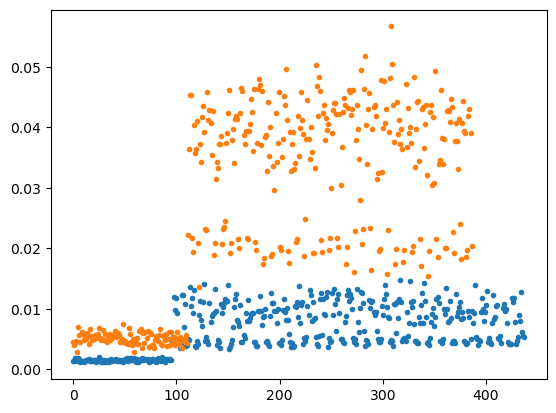

In [29]:
from huayi_providers.fake_huayi37 import FakeHuayi37, FakeHuayi37V2
from huayi_providers.fake_QuantinuumH2 import FakeQuantinuumh2, FakeQuantinuumh2V2
from matplotlib.pyplot import *

display( plot( [g.parameters[0].value for g in FakeQuantinuumh2().properties().gates], '.' ) )
display( plot( [g.parameters[0].value for g in FakeHuayi37().properties().gates], '.' ) )